In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("Loan Delinquent Dataset.csv")

In [3]:
df


,ID,delinquent,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,Yes,1,36 months,Female,House,Mortgage,>25,300-500
1,2,No,0,36 months,Female,House,Rent,20-25,>500
2,3,Yes,1,36 months,Female,House,Rent,>25,300-500
3,4,Yes,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,Yes,1,36 months,Female,House,Rent,>25,300-500
...,...,...,...,...,...,...,...,...,...
11543,11544,No,0,60 months,Male,other,Mortgage,>25,300-500
11544,11545,Yes,1,36 months,Male,House,Rent,20-25,300-500
11545,11546,No,0,36 months,Female,Personal,Mortgage,20-25,>500
11546,11547,Yes,1,36 months,Female,House,Rent,20-25,300-500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              11548 non-null  int64 
 1   delinquent      11548 non-null  object
 2   Sdelinquent     11548 non-null  int64 
 3   term            11548 non-null  object
 4   gender          11548 non-null  object
 5   purpose         11548 non-null  object
 6   home_ownership  11548 non-null  object
 7   age             11548 non-null  object
 8   FICO            11548 non-null  object
dtypes: int64(2), object(7)
memory usage: 812.1+ KB


##  checking data 

In [5]:
df.head()

,ID,delinquent,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,Yes,1,36 months,Female,House,Mortgage,>25,300-500
1,2,No,0,36 months,Female,House,Rent,20-25,>500
2,3,Yes,1,36 months,Female,House,Rent,>25,300-500
3,4,Yes,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,Yes,1,36 months,Female,House,Rent,>25,300-500


##  Dropping unwanted variables


In [6]:
df = df.drop(["ID", "delinquent"], axis = 1)

In [7]:
df.head()

,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,36 months,Female,House,Mortgage,>25,300-500
1,0,36 months,Female,House,Rent,20-25,>500
2,1,36 months,Female,House,Rent,>25,300-500
3,1,36 months,Female,Car,Mortgage,>25,300-500
4,1,36 months,Female,House,Rent,>25,300-500


## many columns are of type object i.e. strings. These need to be converted to ordinal type

## Geting unique counts of all Objects

In [8]:
print("term \n", df.term.value_counts())
print("")
print("gender \n", df.gender.value_counts())
print("")
print("purpose \n", df.purpose.value_counts())
print("")
print("home_ownership \n", df.home_ownership.value_counts())
print("")
print("age \n", df.age.value_counts())
print("")
print("FICO \n", df.FICO.value_counts())
print("")

term 
 36 months    10589
60 months      959
Name: term, dtype: int64

gender 
 Male      6555
Female    4993
Name: gender, dtype: int64

purpose 
 House       6892
Car         2080
Other        928
Personal     892
Wedding      408
Medical      266
other         82
Name: purpose, dtype: int64

home_ownership 
 Mortgage    5461
Rent        5216
Own          871
Name: home_ownership, dtype: int64

age 
 20-25    5888
>25      5660
Name: age, dtype: int64

FICO 
 300-500    6370
>500       5178
Name: FICO, dtype: int64



# Note:
## Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types.

## The following code loops through each column and checks if the column type is object then converts those columns into categorical with each distinct value becoming a category.

In [9]:
for feature in df.columns:
    if df[feature].dtype == "object" :
        print("")
        print("feature:", feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes


feature: term
['36 months', '60 months']
Categories (2, object): ['36 months', '60 months']
[0 1]

feature: gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
[0 1]

feature: purpose
['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical', 'other']
Categories (7, object): ['Car', 'House', 'Medical', 'Other', 'Personal', 'Wedding', 'other']
[1 0 3 4 5 2 6]

feature: home_ownership
['Mortgage', 'Rent', 'Own']
Categories (3, object): ['Mortgage', 'Own', 'Rent']
[0 2 1]

feature: age
['>25', '20-25']
Categories (2, object): ['20-25', '>25']
[1 0]

feature: FICO
['300-500', '>500']
Categories (2, object): ['300-500', '>500']
[0 1]


##  For each feature, look at the 2nd and 4th row to get the encoding mappings. Do not look at the line starting with 'Categories'


   ## Comparing the unique counts from above

In [10]:
print("term \n", df.term.value_counts())
print("")
print("gender \n", df.gender.value_counts())
print("")
print("purpose \n", df.purpose.value_counts())
print("")
print("home_ownership \n", df.home_ownership.value_counts())
print("")
print("age \n", df.age.value_counts())
print("")
print("FICO \n", df.FICO.value_counts())
print("")

term 
 0    10589
1      959
Name: term, dtype: int64

gender 
 1    6555
0    4993
Name: gender, dtype: int64

purpose 
 1    6892
0    2080
3     928
4     892
5     408
2     266
6      82
Name: purpose, dtype: int64

home_ownership 
 0    5461
2    5216
1     871
Name: home_ownership, dtype: int64

age 
 0    5888
1    5660
Name: age, dtype: int64

FICO 
 0    6370
1    5178
Name: FICO, dtype: int64



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sdelinquent     11548 non-null  int64
 1   term            11548 non-null  int8 
 2   gender          11548 non-null  int8 
 3   purpose         11548 non-null  int8 
 4   home_ownership  11548 non-null  int8 
 5   age             11548 non-null  int8 
 6   FICO            11548 non-null  int8 
dtypes: int64(1), int8(6)
memory usage: 158.0 KB


In [12]:
df.head()

,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,0,0,1,0,1,0
1,0,0,0,1,2,0,1
2,1,0,0,1,2,1,0
3,1,0,0,0,0,1,0
4,1,0,0,1,2,1,0


## Label Encoding has been done and all columns are converted to number

## Proportion of 1s and 0s

In [13]:
df.Sdelinquent.value_counts(normalize = True)

1    0.668601
0    0.331399
Name: Sdelinquent, dtype: float64

In [14]:
print(df.Sdelinquent.value_counts())
print("%1s", 7721/(7721+3827))
print("%2s", 3827/(7721+3827))

1    7721
0    3827
Name: Sdelinquent, dtype: int64
%1s 0.668600623484586
%2s 0.3313993765154139


## Extracting the target column into separate vectors for training set and test set

In [15]:
X = df.drop("Sdelinquent", axis = 1)
Y = df.pop("Sdelinquent")
X.head()

,term,gender,purpose,home_ownership,age,FICO
0,0,0,1,0,1,0
1,0,0,1,2,0,1
2,0,0,1,2,1,0
3,0,0,0,0,1,0
4,0,0,1,2,1,0


## Splitting data into training and test set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .30, random_state = 1)

## Checking the dimensions of the training and test data

In [18]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("Y_train", Y_train.shape)
print("Y_test", Y_test.shape)
print("Total obs", 8083 + 3465 )

X_train (8083, 6)
X_test (3465, 6)
Y_train (8083,)
Y_test (3465,)
Total obs 11548


## Building a Decision Tree Classifier

In [19]:
# Initializing a decision tree clasifier  
from sklearn.model_selection import train_test_split

In [20]:
# fit the model
dt_model = DecisionTreeClassifier(criterion = "gini", random_state = 1)

In [21]:
dt_model.fit(X_train, Y_train )

DecisionTreeClassifier(random_state=1)

In [22]:
from sklearn import tree

In [23]:
train_char_labels = ["Yes", "No"]
ld_Tree_File = open("ld_Tree_File.dot", "w")
dot_data = tree.export_graphviz(dt_model,
                               out_file = "ld_Tree_File",
                               feature_names = list(X_train),
                               class_names = list(train_char_labels))

In [24]:
ld_Tree_File.close()

## Variable Importance

In [25]:
print(pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values("Imp", ascending = False))

                     Imp
FICO            0.393915
term            0.370052
gender          0.158664
age             0.055813
purpose         0.010924
home_ownership  0.010633


## Predicting Test Data

In [26]:
y_predict = dt_model.predict(X_test)

In [27]:
y_predict.shape

(3465,)

## Regularising the Decision Tree
## Adding Tuning Parameters

In [28]:
reg_dt_model = DecisionTreeClassifier(criterion = "gini", max_depth = 30, min_samples_leaf = 100, min_samples_split = 1000, random_state = 1 )

#  min_samples_leaf = x , min_samples_split = 3x (not a fixed one but better to do so) 

In [29]:
reg_dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=100,
                       min_samples_split=1000, random_state=1)

## Generating New Tree

In [30]:
ld_tree_regularized = open("ld_tree_regularized.dot", "w")

dot_data = tree.export_graphviz(reg_dt_model, out_file = ld_tree_regularized, feature_names = list(X_train), class_names = train_char_labels)
ld_tree_regularized.close()
dot_data

## Variable Importance

In [31]:
print(pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values("Imp", ascending = False))

                     Imp
FICO            0.424274
term            0.339141
gender          0.169328
age             0.060114
home_ownership  0.003659
purpose         0.003483


In [32]:
reg_dt_model.feature_importances_

array([0.33914128, 0.16932759, 0.00348345, 0.00365879, 0.06011447,
       0.42427443])

In [33]:
ytrain_predict3 = reg_dt_model.predict(X_train)
ytest_predict3 = reg_dt_model.predict(X_test)

In [34]:
ytrain_predict4 = reg_dt_model.predict_proba(X_train)
ytest_predict4 = reg_dt_model.predict_proba(X_test)

In [35]:
ytrain_predict3

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [36]:
ytrain_predict4

array([[0.18677494, 0.81322506],
       [1.        , 0.        ],
       [0.18677494, 0.81322506],
       ...,
       [0.12938331, 0.87061669],
       [0.12938331, 0.87061669],
       [0.1768018 , 0.8231982 ]])

In [37]:
print('ytrain_predict',ytrain_predict3.shape)
print('ytest_predict',ytest_predict3.shape)

ytrain_predict (8083,)
ytest_predict (3465,)


In [39]:
pd.DataFrame(ytrain_predict4).head()

,0,1
0,0.186775,0.813225
1,1.000000,0.000000
2,0.186775,0.813225
3,0.000000,1.000000
4,0.753669,0.246331


## Model Evaluation
## Measuring AUC-ROC Curve

In [40]:
import matplotlib.pyplot as plt

## AUC and ROC for the training data

AUC 0.881


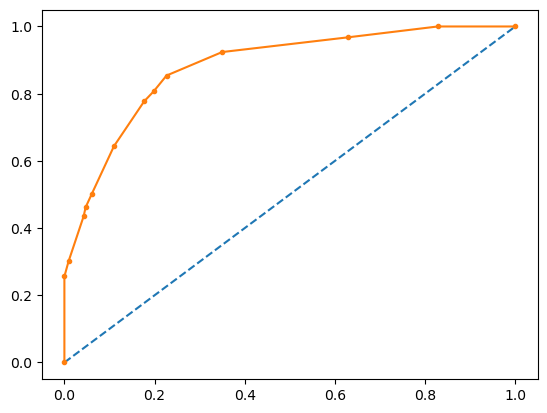

In [43]:
# predict probablities
probs = reg_dt_model.predict_proba(X_test)
# keep probablities for the positive outcomes only
probs = probs[:, 1]
# calcutate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
print("AUC %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle = "--")
# plot the roc curve for the model
plt.plot(fpr, tpr, marker = ".")
# show the plot
plt.show()

## Confusion Matrix for the training data

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
confusion_matrix(Y_train, ytrain_predict3)

array([[1985,  650],
       [ 706, 4742]], dtype=int64)

In [46]:
## Train data Accuraccy

In [47]:
reg_dt_model.score(X_train, Y_train)

0.832240504763083

In [48]:
print(classification_report(Y_test, ytest_predict3))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1192
           1       0.88      0.85      0.87      2273

    accuracy                           0.83      3465
   macro avg       0.81      0.81      0.81      3465
weighted avg       0.83      0.83      0.83      3465



## Confusion matrix for test data

In [49]:
confusion_matrix(Y_test, ytest_predict3)

array([[ 922,  270],
       [ 332, 1941]], dtype=int64)

In [51]:
# test data accuraccy

reg_dt_model.score(X_test, Y_test)

0.8262626262626263

In [52]:
print((922+1941)/(922+270+332+1941))

0.8262626262626263


In [53]:
print(classification_report(Y_test, ytest_predict3))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1192
           1       0.88      0.85      0.87      2273

    accuracy                           0.83      3465
   macro avg       0.81      0.81      0.81      3465
weighted avg       0.83      0.83      0.83      3465

